<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
df=pd.read_excel("/content/pv_08.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [102]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [103]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [104]:
n_inputs=weather_input.shape[1]

In [105]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [106]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [107]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
198/198 - 2s - loss: 0.0921 - 2s/epoch - 10ms/step
Epoch 2/100
198/198 - 1s - loss: 0.0192 - 584ms/epoch - 3ms/step
Epoch 3/100
198/198 - 1s - loss: 0.0152 - 560ms/epoch - 3ms/step
Epoch 4/100
198/198 - 1s - loss: 0.0132 - 527ms/epoch - 3ms/step
Epoch 5/100
198/198 - 1s - loss: 0.0125 - 541ms/epoch - 3ms/step
Epoch 6/100
198/198 - 1s - loss: 0.0125 - 522ms/epoch - 3ms/step
Epoch 7/100
198/198 - 1s - loss: 0.0116 - 518ms/epoch - 3ms/step
Epoch 8/100
198/198 - 1s - loss: 0.0104 - 532ms/epoch - 3ms/step
Epoch 9/100
198/198 - 1s - loss: 0.0097 - 549ms/epoch - 3ms/step
Epoch 10/100
198/198 - 1s - loss: 0.0096 - 502ms/epoch - 3ms/step
Epoch 11/100
198/198 - 1s - loss: 0.0090 - 521ms/epoch - 3ms/step
Epoch 12/100
198/198 - 1s - loss: 0.0088 - 532ms/epoch - 3ms/step
Epoch 13/100
198/198 - 1s - loss: 0.0087 - 560ms/epoch - 3ms/step
Epoch 14/100
198/198 - 1s - loss: 0.0083 - 512ms/epoch - 3ms/step
Epoch 15/100
198/198 - 1s - loss: 0.0081 - 550ms/epoch - 3ms/step
Epoch 16/100
198/198 

In [108]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [109]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

198/198 [==============================] - 0s 1ms/step


In [110]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

198/198 [==============================] - 0s 1ms/step


In [111]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [113]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [114]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
48/48 [==============================] - 13s 64ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 2/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 4/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 5/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 6/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/100
48/48 [==============================] - 2s 36ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 8/100
48/48 [==============================] - 2s 35ms/step - loss: 0

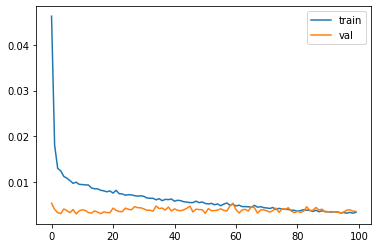

79/79 [==============================] - 2s 7ms/step


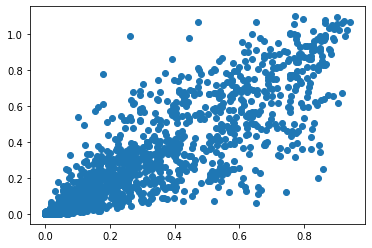

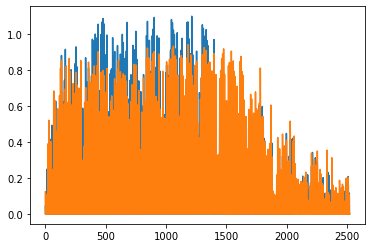

0.11099966304022633


In [115]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
48/48 [==============================] - 16s 64ms/step - loss: 0.0269 - mse: 0.0269 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2/200
48/48 [==============================] - 2s 36ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 3/200
48/48 [==============================] - 2s 36ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/200
48/48 [==============================] - 2s 36ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 5/200
48/48 [==============================] - 2s 35ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 6/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/200
48/48 [==============================] - 2s 35ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/200
48/48 [==============================] - 2s 35ms/step - loss: 0

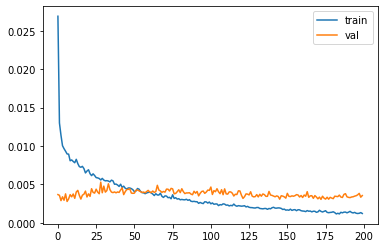

79/79 [==============================] - 2s 6ms/step


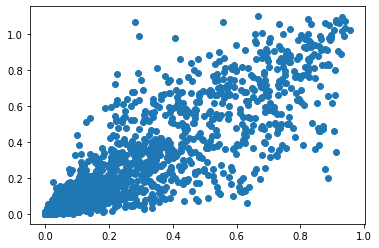

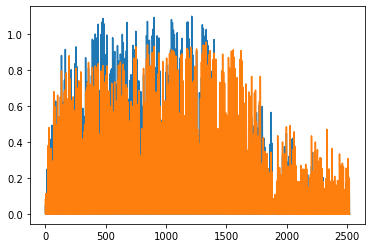

0.11587140741422636
0.05955627601643749


In [116]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [117]:
from keras.layers import Bidirectional


Epoch 1/100
48/48 [==============================] - 28s 136ms/step - loss: 0.0217 - mse: 0.0217 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 2/100
48/48 [==============================] - 4s 79ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/100
48/48 [==============================] - 4s 85ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4/100
48/48 [==============================] - 4s 87ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 5/100
48/48 [==============================] - 4s 77ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/100
48/48 [==============================] - 4s 78ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/100
48/48 [==============================] - 4s 76ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/100
48/48 [==============================] - 4s 80ms/step - loss: 

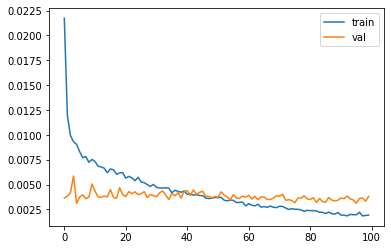

79/79 [==============================] - 4s 14ms/step


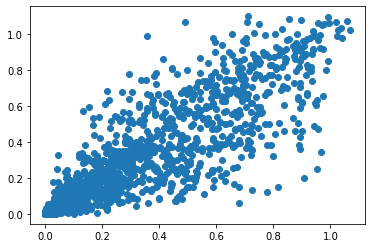

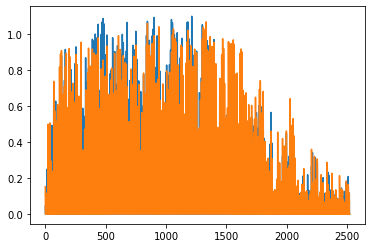

0.11276065404664658
0.05659627942413596


In [118]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
48/48 [==============================] - 28s 154ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 2/100
48/48 [==============================] - 4s 78ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/100
48/48 [==============================] - 4s 75ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 4/100
48/48 [==============================] - 4s 77ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 5/100
48/48 [==============================] - 4s 76ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 6/100
48/48 [==============================] - 4s 77ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 7/100
48/48 [==============================] - 4s 77ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/100
48/48 [==============================] - 4s 76ms/step - loss: 

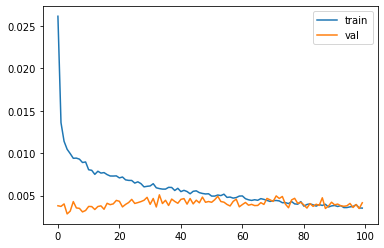

79/79 [==============================] - 4s 14ms/step


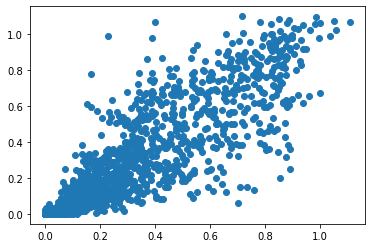

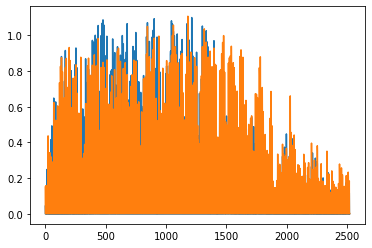

0.11285777237724247
0.06121529720566435


In [119]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [120]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [121]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [122]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 2, 20)             820       
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 2, 20)             820       
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [123]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
48/48 [==============================] - 3s 13ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - val_loss: 0.2241 - val_mean_absolute_error: 0.2241
Epoch 2/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - val_loss: 0.1729 - val_mean_absolute_error: 0.1729
Epoch 3/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1439 - mean_absolute_error: 0.1439 - val_loss: 0.1484 - val_mean_absolute_error: 0.1484
Epoch 4/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - val_loss: 0.1280 - val_mean_absolute_error: 0.1280
Epoch 5/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - val_loss: 0.1157 - val_mean_absolute_error: 0.1157
Epoch 6/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - val_loss: 0.1064 - val_mean_absolute_error: 0.1064
Epoch 7/200
48/48 [==

In [124]:
y=SimRNN.predict(X_test)

79/79 [==============================] - 1s 2ms/step


In [125]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.11324945904056218
0.0677682786294598


In [126]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
60/60 [==============================] - 8s 11ms/step - loss: 0.0367
Epoch 2/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0142
Epoch 3/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0129
Epoch 4/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0116
Epoch 5/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0109
Epoch 6/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 7/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0099
Epoch 8/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0097
Epoch 9/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0097
Epoch 10/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0100
Epoch 11/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0090
Epoch 12/200
60/60 [==============================] - 1s 11ms/step - loss: 0.0083
Epoch 13/200
60/60 [=====

In [127]:
y=regressor1.predict(X_test)

79/79 [==============================] - 2s 3ms/step


In [128]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.11769119788152942
0.062306290351562786
